In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv")

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [8]:
df=pd.get_dummies(df)

In [9]:
x=df.drop(['Purchased'],axis=1)

In [11]:
y=df['Purchased'].values

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
#fitting random forest classification to yhe training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
#predicting the test set results
y_pred=classifier.predict(x_test)

In [16]:
#to measure the accuracy of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.93

In [17]:
#making confusion matrix
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

In [18]:
#classification report
z=classification_report(y_test,y_pred)
print(z) 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [19]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [20]:
#for computing Receiver operating characteristics
from sklearn.metrics import roc_curve
#for computing area under curve
from sklearn.metrics import roc_auc_score

In [26]:
#visualizing the ROC-AUC curve
y_proba=classifier.predict_proba(x_test)

#we take the predicted values of class 1
y_predicted=y_proba[:,1]

#we check to see if the right values have been considered from the predicted values
print(y_predicted)

[0.2 0.  0.  0.  0.  0.  0.  1.  0.  0.8 0.  0.  0.2 0.2 0.  0.6 0.4 0.
 0.9 0.1 0.  1.  0.  1.  0.  1.  0.2 0.  0.  0.2 0.2 0.  1.  0.  0.  0.
 0.  0.  0.  1.  0.1 0.  0.  0.  0.7 0.  0.3 0.8 0.1 0.8 1.  0.  0.  0.8
 1.  0.8 0.  0.  0.9 0.  0.  0.8 0.  1.  0.  0.9 0.1 0.  0.  0.2 1.  0.
 0.1 0.8 0.1 0.  0.  0.  1.  0.7 0.9 1.  0.  0.  1.  0.1 0.1 0.9 0.7 0.
 0.1 0.9 0.  0.1 0.  0.5 0.1 0.8 0.9 1. ]


In [28]:
#using roc_curve() to generate fpr & tpr values
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [29]:
#passing the fpr&tpr values to auc()to calculate the area under curve
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the curve for first model",roc_auc)

Area under the curve for first model 0.953125


Text(0, 0.5, 'True Positive Rate(Sensitivity)')

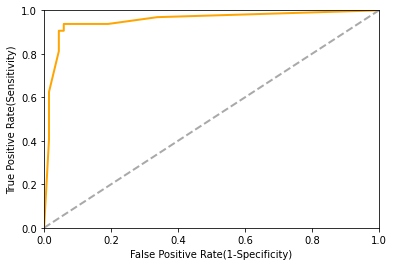

In [32]:
#plotting the ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=2,label='ROC curve(area under curve=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='darkgrey',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
